<a href="https://colab.research.google.com/github/Mansi-2214/Bharat_InternProjects/blob/main/cats%26dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Cat and Dog Image Classifier

In [3]:
!mkdir -p ~/.kaggle
!cp kagggle.json ~/.kaggle/

cp: cannot stat 'kagggle.json': No such file or directory


In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:05<00:00, 228MB/s]
100% 1.06G/1.06G [00:05<00:00, 211MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [7]:
#generators .create batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [8]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)

In [9]:
#creating CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization (Batch  (None, 125, 125, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                        

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 84s 119ms/step - loss: 0.9333 - accuracy: 0.6561 - val_loss: 0.9357 - val_accuracy: 0.5677
Epoch 2/10
625/625 [==============================] - 75s 120ms/step - loss: 0.5715 - accuracy: 0.7311 - val_loss: 0.4992 - val_accuracy: 0.7742
Epoch 3/10
625/625 [==============================] - 88s 140ms/step - loss: 0.4991 - accuracy: 0.7700 - val_loss: 0.5963 - val_accuracy: 0.7476
Epoch 4/10
625/625 [==============================] - 88s 141ms/step - loss: 0.4050 - accuracy: 0.8156 - val_loss: 0.5194 - val_accuracy: 0.7580
Epoch 5/10
625/625 [==============================] - 74s 118ms/step - loss: 0.3585 - accuracy: 0.8436 - val_loss: 0.4713 - val_accuracy: 0.7762
Epoch 6/10
625/625 [==============================] - 75s 119ms/step - loss: 0.2985 - accuracy: 0.8667 - val_loss: 0.5823 - val_accuracy: 0.7901
Epoch 7/10
625/625 [==============================] - 79s 126ms/step - loss: 0.2515 - accuracy: 0.8934 - val_loss: 0.3564 - val_ac

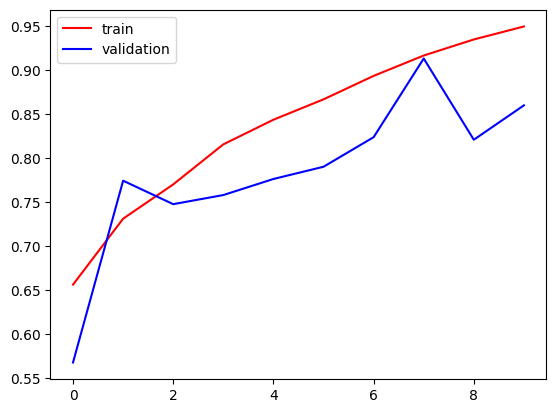

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


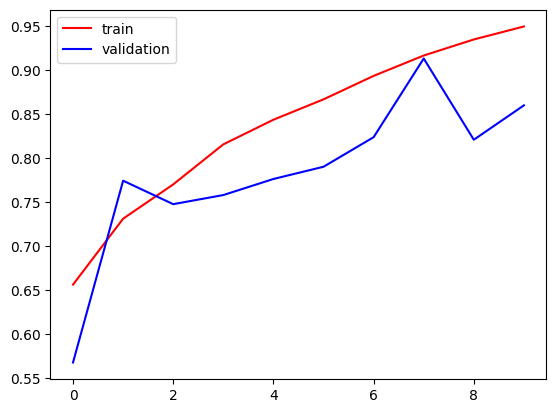

In [14]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

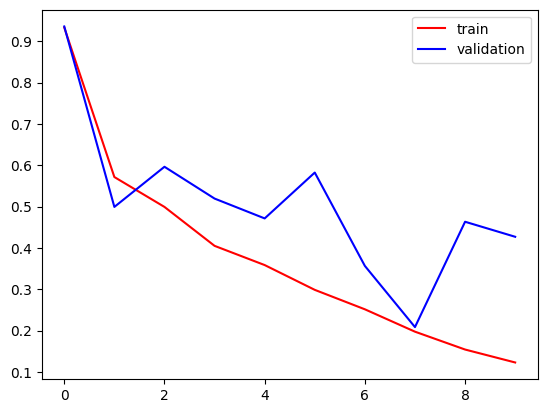

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#need to reduce the complexity
#add more data
#reducing complexity


In [16]:
import cv2

In [24]:
test_image = cv2.imread('/content/dog.jpg')

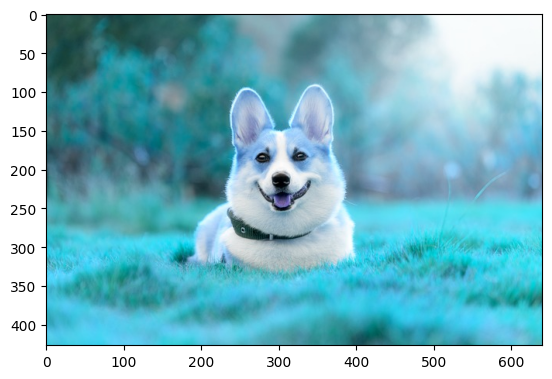

In [25]:
plt.imshow(test_image)

In [26]:
test_image.shape

(427, 640, 3)

In [27]:
test_image = cv2.resize(test_image,(256,256))


In [28]:
test_input = test_image.reshape(1,256,256,3)

In [29]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.99452597]], dtype=float32)